In [7]:
# used python_speech_features library
# https://github.com/jameslyons/python_speech_features

import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import numpy as np

from baseModel import *

%matplotlib inline

In [2]:
rate, audio = wav.read('english.wav')
mfcc_feat = mfcc(audio)

In [3]:
fbank_feat = fbank(audio,rate)

In [4]:
def getMelFilterBank(sampling_freq = 16000, lowfreq=0, highfreq=None, n_filters=20,
                     nfft=1024):
    
    """ Generates MF bank from audio signal """

    highfreq = highfreq if highfreq else sampling_freq / 2

    lowmel = hz2mel(lowfreq)
    highmel = hz2mel(highfreq)
    melpoints = np.linspace(lowmel, highmel, n_filters + 2)
    freqpoints = mel2hz(melpoints)
    bin = nfft * freqpoints / sampling_freq

    fbank = np.zeros((n_filters, int(np.floor(nfft / 2 + 1))))

    for m in range(1, n_filters + 1):
        f_m_minus = int(math.floor(bin[m - 1]))  # left
        f_m = int(round(bin[m]))                 # center
        f_m_plus = int(math.ceil(bin[m + 1]))    # right
        for k in range(f_m_minus, f_m_plus):
            xidx = [f_m_minus, f_m, f_m_plus]
            yidx = [0, 1, 0]
            if k < bin[m - 1] or k > bin[m + 1]:
                fbank[m - 1, k] = 0
            else:
                fbank[m - 1, k] = np.interp(k, xidx, yidx)
    return fbank


def plotMelFilters(n_filters=26, sampling_freq=16000, maxrange=8000,
                   save_path=None):

    """ Generate Mel filter bank plot
        maxrange: maximum frequency range to be plotted
        save_path: output plot destination
    """
    fbank = getMelFilterBank(sampling_freq)
    highfreq = sampling_freq / 2
    r, c = fbank.shape
    frequencies = np.linspace(0, highfreq, c)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("{} Triangular MFCC filters {} Hz signal, window size {}"
                 .format(n_filters, sampling_freq, 1024))
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Amplitude")
    ax.set_xlim([0, maxrange])
    for i in range(r):
        ax.plot(frequencies, fbank[i])
    if not save_path:
        plt.show()


In [5]:
def plotMelFiltersPSF(n_filters=26, sampling_freq=16000, maxrange=8000,
                   save_path=None):

    fbank = get_filterbanks()
    highfreq = sampling_freq / 2
    r, c = fbank.shape
    frequencies = np.linspace(0, highfreq, c)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("{} Triangular MFCC filters {} Hz signal, window size {}"
                 .format(n_filters, sampling_freq, 1024))
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Amplitude")
    ax.set_xlim([0, maxrange])
    for i in range(r):
        ax.plot(frequencies, fbank[i])
    if not save_path:
        plt.show()

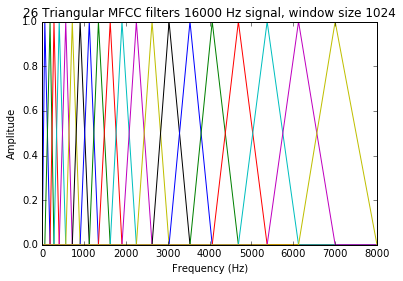

In [8]:
plotMelFiltersPSF() # PSF filterbank

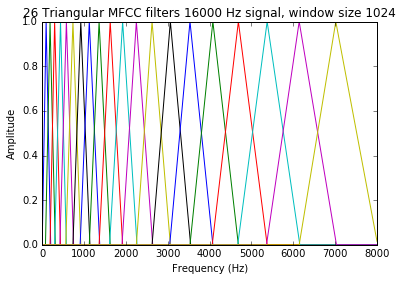

In [9]:
plotMelFilters() # OUR filterbank

# IMFCC feature

In [10]:
def IMFCC_Filterbank(n_filters=26, sampling_freq=16000, maxrange=8000,
                   save_path=None):
 
    fbank = get_filterbanks()[:,::-1]
    highfreq = sampling_freq / 2
    r, c = fbank.shape
    frequencies = np.linspace(0, highfreq, c)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("{} Triangular IMFCC filters {} Hz signal, window size {}"
                 .format(n_filters, sampling_freq, 1024))
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Amplitude")
    ax.set_xlim([0, maxrange])
    for i in range(r):
        ax.plot(frequencies, fbank[i])
    if not save_path:
        plt.show()

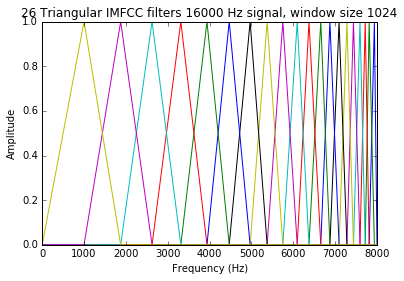

In [11]:
IMFCC_Filterbank()